Learning Python w numpy, pandas & matplotlib

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Read in Data & Glance

In [72]:
sales = pd.read_csv('/Users/jasminelo/Desktop/data/python/pandas 101/sales_data.csv - sales_data.csv', parse_dates=['Date'])
## Note: add parse_dates=['column'] coz pandas save dates as str

In [73]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [74]:
sales.shape #rows & columns
sales.info() #basic info of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [75]:
sales.describe() #summary of data

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


Numerical Analysis & Visualization

In [76]:
#Numerical analysis on ['Unit_Cost'] column
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

<AxesSubplot:>

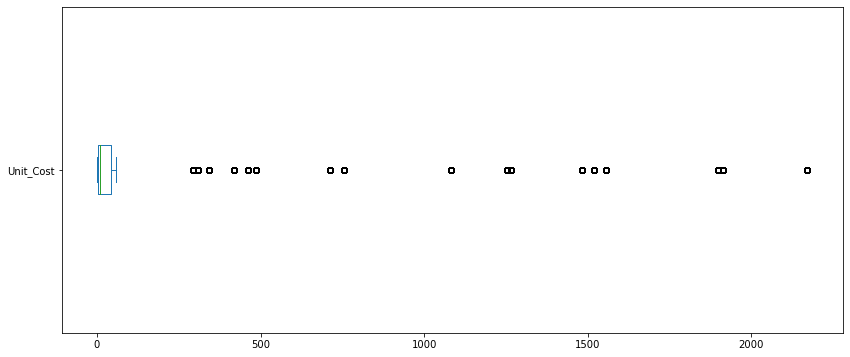

In [77]:
#Visualization on Unit_Cost (matplotlib)
#Boxplot
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

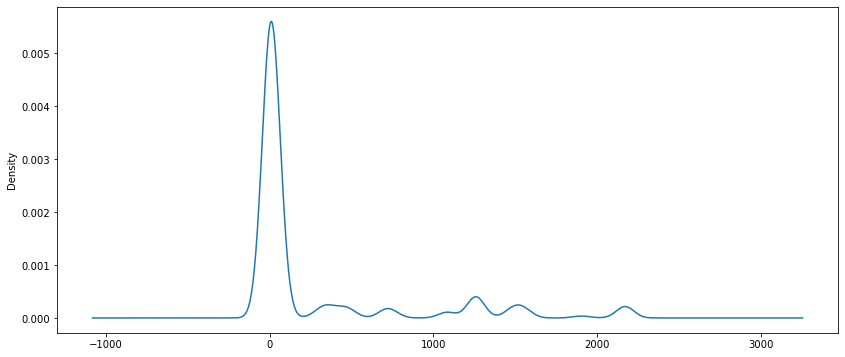

In [78]:
#Kernel density chart
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

Text(0.5, 0, 'Unit Cost in dollars')

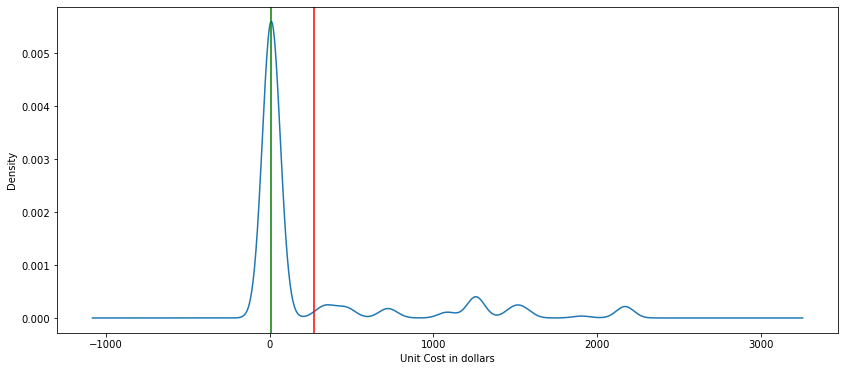

In [79]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color = 'red')
ax.axvline(sales['Unit_Cost'].median(), color = 'green')
#add a mean, median line using ax.axvline(data.mean(), color='')
ax.set_xlabel('Unit Cost in dollars')
#add label for axis

Text(0.5, 0, 'dollars')

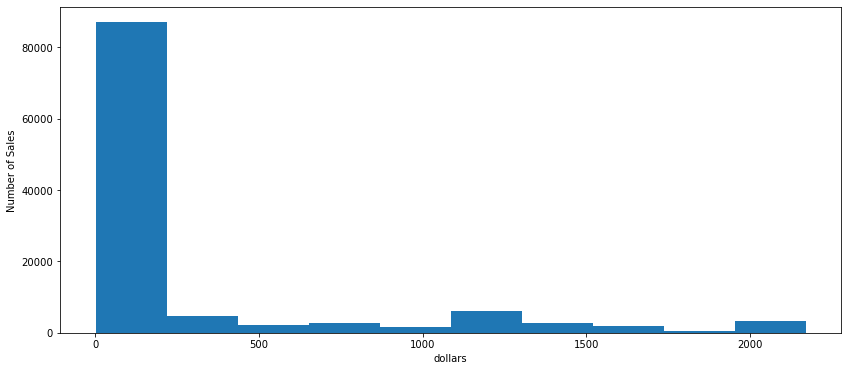

In [80]:
#Histogram
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

Categorical Analysis & Visualization

In [81]:
#Age_Group column
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

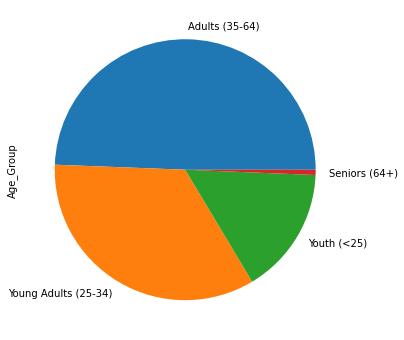

In [82]:
#Pie Chart
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Correlation between the columns

In [83]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


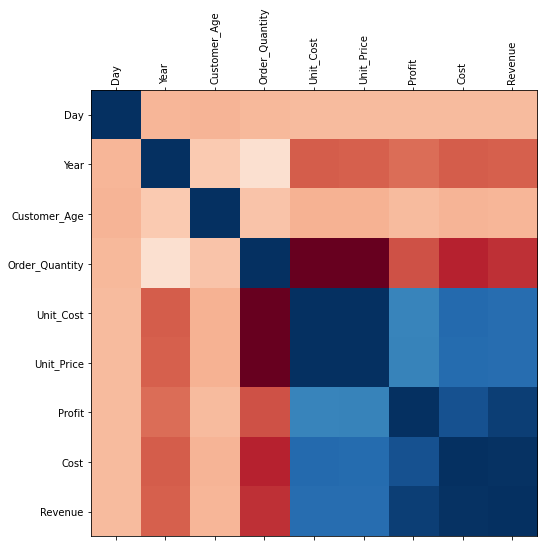

In [84]:
#plot a cor chart
corr_fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum= corr_fig.number)
#cmap means colormaps = redblue
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
#rotate axis label by using rotation='vertical'
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

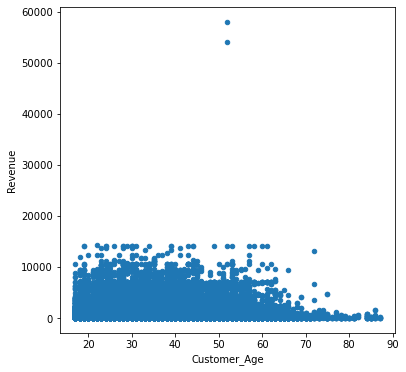

In [85]:
#scatter plot
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

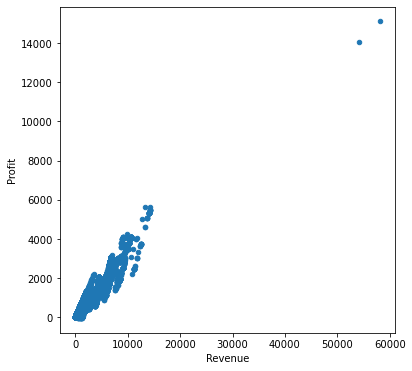

In [86]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

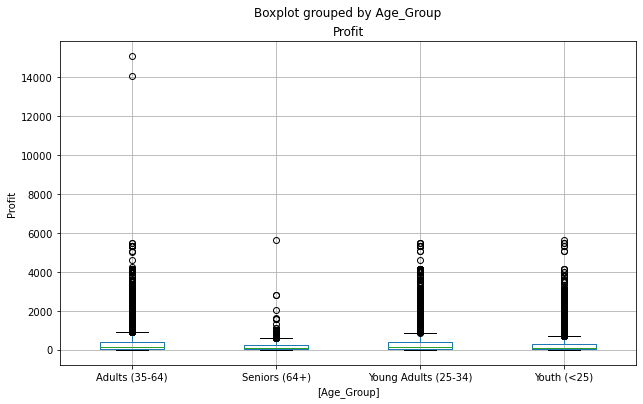

In [87]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

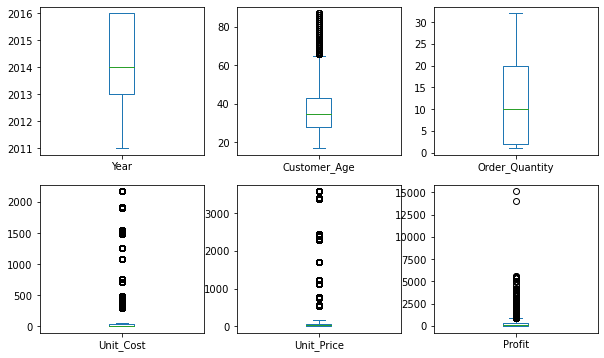

In [88]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(10,6))

Column Wrangling (data cleaning)
create new columns or modify existing ones

In [89]:
#Add and calculate a new Revenue_per_Age column
sales['Revenue_per_Age']=sales['Revenue']/sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

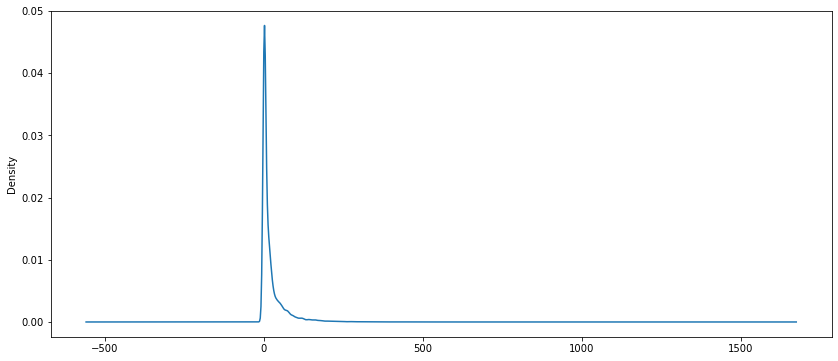

In [90]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

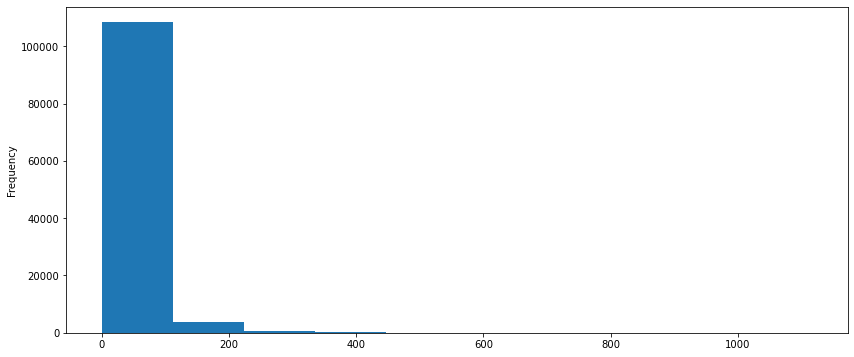

In [91]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

In [92]:
#Add and calculate a new Calculated_Cost column
sales['Calculated_Cost'] = sales['Order_Quantity']*sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [93]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

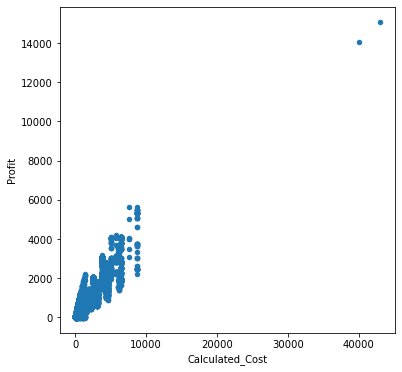

In [94]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

In [95]:
#Add a new Calculated_Revenue column
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [96]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()
#doublecheck w the revenue column (they should be the same)

0

<AxesSubplot:ylabel='Frequency'>

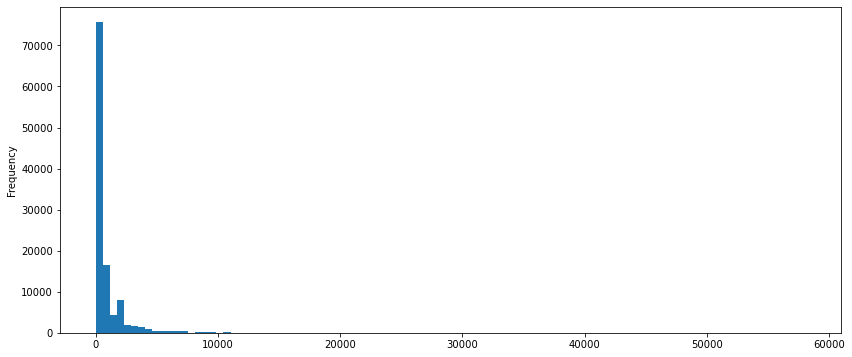

In [97]:
sales['Revenue'].plot(kind='hist',bins=100, figsize=(14,6))

Modify all Unit_Price values adding 3% tax to them

In [98]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [99]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

In [100]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

Selection & Indexing

In [101]:
#Return all sales made in the state of Kentucky
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


In [102]:
#the mean revenue of the Adults (35-64) sales group
sales.loc[sales['Age_Group']== 'Adults (35-64)','Revenue'].mean()

762.8287654055604

In [103]:
#return records of Age group Youth(<25) or Adults (35-64)
# use'|' for or
sales.loc[(sales['Age_Group']== 'Youth (<25)')|(sales['Age_Group']== 'Adults (35-64)')]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.60,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.60,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,123.60,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,123.60,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,123.60,238,180,418,8.893617,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,"Classic Vest, S",3,24,65.92,112,72,184,4.487805,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,65.92,655,528,1183,65.722222,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,65.92,655,528,1183,65.722222,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,"Classic Vest, L",24,24,65.92,684,576,1260,34.054054,576,1260


# Exercise

In [105]:
#What's the mean of Customer_Age?
sales['Customer_Age'].mean()

35.91921157861212

<AxesSubplot:ylabel='Density'>

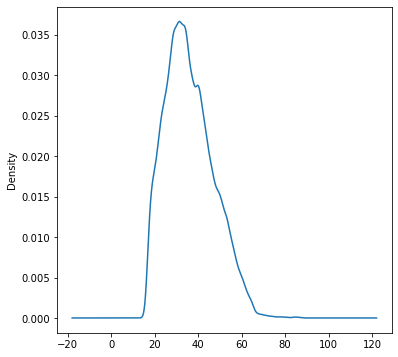

In [109]:
#Show a density (KDE) and a box plot with the Customer_Age
sales['Customer_Age'].plot(kind='kde', figsize=(6,6))

<AxesSubplot:>

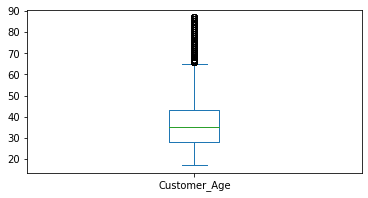

In [111]:
sales['Customer_Age'].plot(kind='box', figsize=(6,3))

In [112]:
#What's the mean of Order_Quantity?
sales['Order_Quantity'].mean()

11.901659648253654

<AxesSubplot:ylabel='Frequency'>

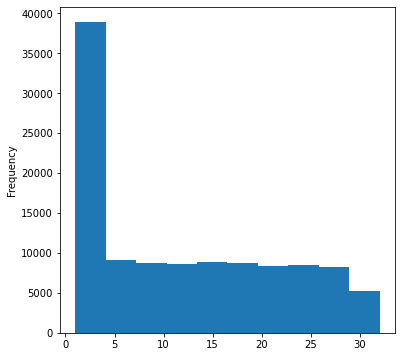

In [113]:
#Show a histogram and a box plot with the Order_Quantity
sales['Order_Quantity'].plot(kind='hist', figsize = (6,6))

In [114]:
#How many "sales per year" do we have?
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:ylabel='Year'>

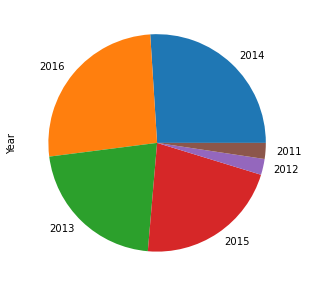

In [115]:
#show a pie plot with the previous data
sales['Year'].value_counts().plot(kind='pie', figsize = (5,5))

In [116]:
#How many sales per month do we have?
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot:>

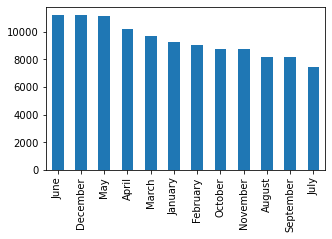

In [120]:
#show a bar plot with the previous data
sales['Month'].value_counts().plot(kind='bar', figsize = (5,3))

In [122]:
#Which country has the most sales quantity of sales?
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

<AxesSubplot:>

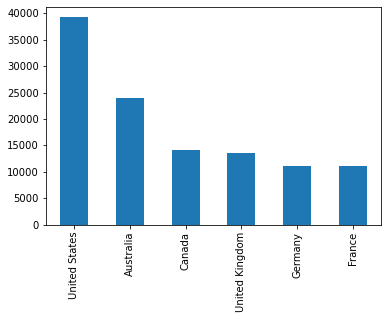

In [123]:
#show a bar plot of the sales per country
sales['Country'].value_counts().plot(kind='bar')

In [124]:
#Create a list of every product sold
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<AxesSubplot:>

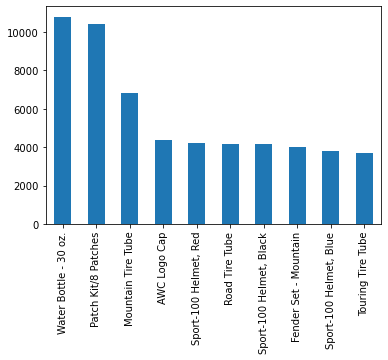

In [127]:
#Create a bar plot showing the 10 most sold products (best sellers):
sales['Product'].value_counts(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

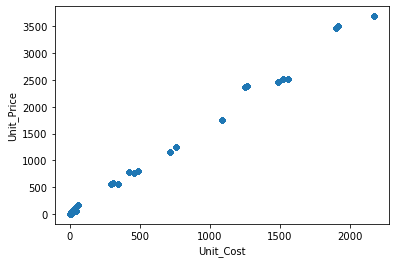

In [129]:
#Can you see any relationship between Unit_Cost and Unit_Price?
##Show a scatter plot between both columns.
sales.plot(kind = 'scatter', x = 'Unit_Cost', y = 'Unit_Price')

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

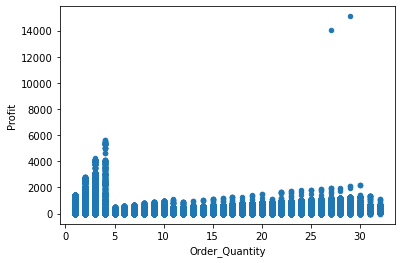

In [130]:
#Can you see any relationship between Order_Quantity and Profit?
##Show a scatter plot between both columns.
sales.plot(kind = 'scatter', x = 'Order_Quantity', y = 'Profit')

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

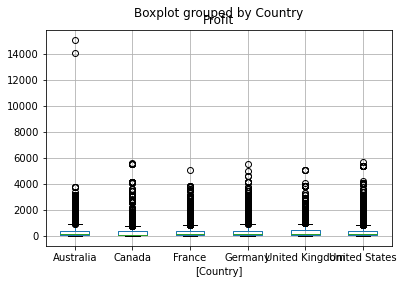

In [131]:
#Can you see any relationship between Profit per Country?
##Show a grouped box plot per country with the profit values.
sales[['Profit','Country']].boxplot(by='Country')
#Box plot group by use by='column'
#Note: use double brackets if u select more than one column

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

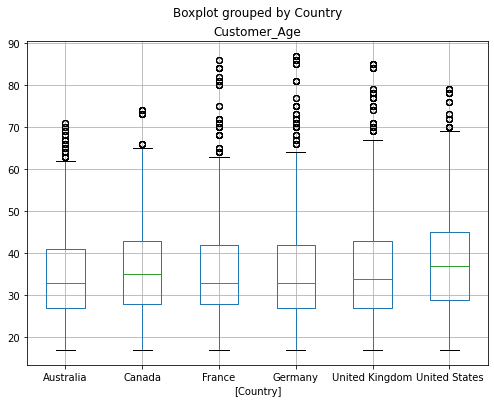

In [137]:
#Can you see any relationship between the Customer_Age per Country?
##Show a grouped box plot per country with the customer age values.
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize = (8,6))

In [147]:
#Add and calculate a new Calculated_Date column
##Use Day, Month, Year to create a Date column (YYYY-MM-DD).
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
#use lambda function when adding str and int
sales['Calculated_Date'].head()


0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [149]:
#Parse your Calculated_Date column into a datetime object
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

<AxesSubplot:>

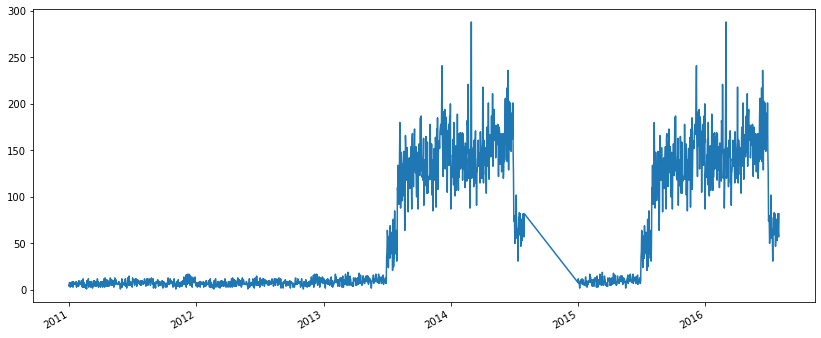

In [150]:
#How did sales evolve through the years?
##Show a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis.
sales['Calculated_Date'].value_counts().plot(kind='line', figsize = (14,6))

In [152]:
#Increase 50 U$S revenue to every sale
sales['Revenue'] += 50
sales['Revenue'].head()

0    1050
1    1050
2    2501
3    2188
4     518
Name: Revenue, dtype: int64

In [157]:
#How many orders were made in Canada or France?
sales.loc[(sales['Country'] == 'Canada') | (sales['Country']=='France')].shape[0]
#Note: shape returns (rows and columns), shape[0] only returns no. of rows
#Note: shape function doesn't have ()

25176

In [159]:
#How many Bike Racks orders were made from Canada?
sales.loc[(sales['Country']=='Canada') & (sales['Sub_Category']=='Bike Racks')].shape[0]

104

In [161]:
#How many orders were made in each region (state) of France?
sales.loc[(sales['Country']=='France', 'State')].value_counts()
#Note: first return rows of state in which country = France, then use value_counts to return unique number of orders
##Go ahead and show a bar plot with the results:


Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<AxesSubplot:>

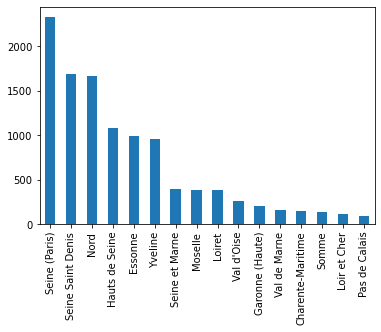

In [162]:
sales.loc[(sales['Country']=='France', 'State')].value_counts().plot(kind='bar')

In [164]:
#How many sales were made per category?
sales['Product_Category'].value_counts()
##Go ahead and show a pie plot with the results:

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot:ylabel='Product_Category'>

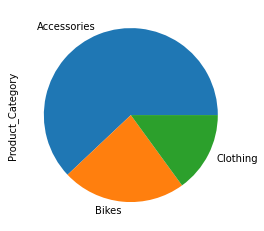

In [165]:
sales['Product_Category'].value_counts().plot(kind='pie')

<AxesSubplot:>

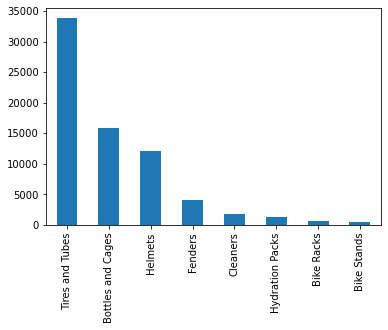

In [175]:
#How many orders were made per accessory sub-categories?
sales.loc[(sales['Product_Category']=='Accessories'),'Sub_Category'].value_counts()
##Go ahead and show a bar plot with the results:
sales.loc[(sales['Product_Category']=='Accessories'),'Sub_Category'].value_counts().plot(kind='bar')


In [177]:
#How many orders were made per bike sub-categories?
sales.loc[(sales['Product_Category']=='Bikes'),'Sub_Category'].value_counts()
##Go ahead and show a pie plot with the results:

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<AxesSubplot:ylabel='Sub_Category'>

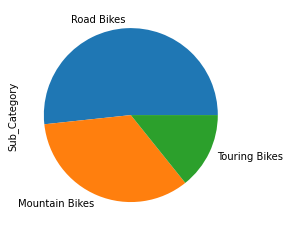

In [178]:
sales.loc[(sales['Product_Category']=='Bikes'),'Sub_Category'].value_counts().plot(kind='pie')

In [179]:
#Which gender has the most amount of sales?
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

In [183]:
#How many sales with more than 500 in Revenue were made by men?
sales.loc[(sales['Revenue'] > 500) & (sales['Customer_Gender']=='M')].shape[0]

24843

In [184]:
#Get the top-5 sales with the highest revenue
sales.sort_values(['Revenue'], ascending = False).head(5)
#Use sort_values to sort

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58174,1116.807692,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,...,27,1482,2455.52,14055,40014,54169,1039.788462,40014,54069,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,...,4,2171,3685.34,5628,8684,14412,650.545455,8684,14312,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,...,4,2171,3685.34,5485,8684,14269,322.022727,8684,14169,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,...,4,2171,3685.34,5485,8684,14269,745.736842,8684,14169,2011-09-30


In [186]:
#Get the sale with the highest revenue
sales.sort_values(['Revenue'], ascending = False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58174,1116.807692,42978,58074,2015-07-24


In [196]:
#What is the mean Order_Quantity of orders with more than 10K in revenue?
high_revenue = sales['Revenue']>10000
sales.loc[(high_revenue, 'Order_Quantity')].mean()
#data.loc[(row selection),(column selection)]

3.6853932584269664

In [197]:
#What is the mean Order_Quantity of orders with less than 10K in revenue?
low_revenue = sales['Revenue']<10000
sales.loc[(low_revenue, 'Order_Quantity')].mean()

11.914618369987064

In [205]:
#How many orders were made in May of 2016?
sales.loc[(sales['Year']==2016) & (sales['Month']=='May')].shape[0]

5015

In [206]:
#How many orders were made between May and July of 2016?
sales.loc[(sales['Year']==2016) & (sales['Month'].isin(['May','June','July']))].shape[0]
## use isin. for more than one condition in a column
##Show a grouped box plot per month with the profit values.

12164

In [210]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
#data.loc[condition for rows,['column1','column2']]
profit_2016

,Profit,Month
3,1188,March
5,297,May
7,100,May
9,1046,February
19,74,January
...,...,...
113023,1007,March
113025,542,April
113031,112,April
113033,655,April


<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

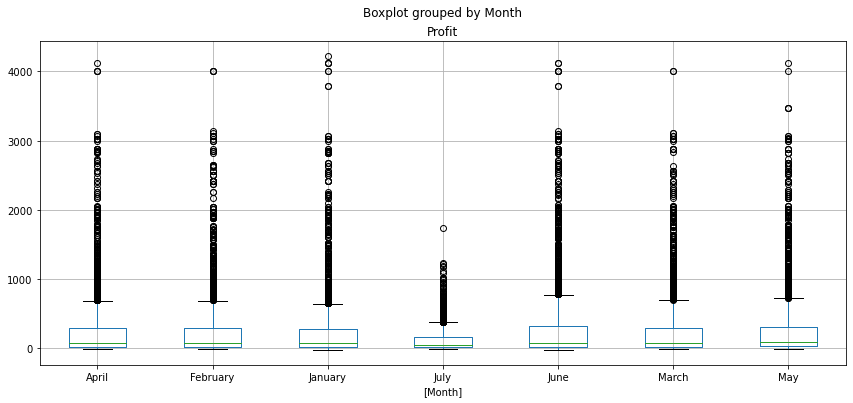

In [211]:
profit_2016.boxplot(by='Month', figsize=(14,6))

In [213]:
#Add 7.2% TAX on every sale Unit_Price within United States
sales.loc[sales['Country']=='United States', 'Unit_Price']*= 1.072